In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [4]:
df=pd.read_csv('/home/dion/Desktop/banknotes.csv')
df.columns=['a','b','c','d','e']


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)


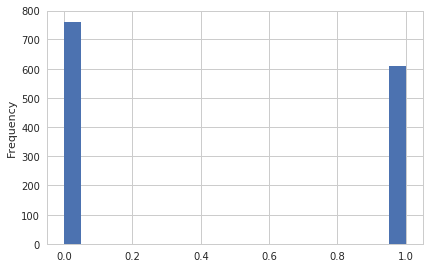

In [15]:
df['e'].plot.hist(bins=20)


In [16]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('e',axis=1),df['e'],test_size=0.25,random_state=42)

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [19]:
accuracy_score(pred,y_test)

0.9912536443148688

In [24]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.991254
1,LinearSVM,0.991254
2,rbfSVM,1.000000
3,KNearestNeighbors,1.000000
4,RandomForestClassifier,0.988338
5,DecisionTree,0.988338
6,GradientBoostingClassifier,0.997085
7,GaussianNB,0.854227


In [25]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [29]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:3]
    Y=df['e'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [30]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.991254,0.965015,0.985423
1,LinearSVM,0.991254,0.985423,0.991254
2,rbfSVM,1.000000,0.979592,1.000000
3,KNearestNeighbors,1.000000,0.997085,0.997085
4,RandomForestClassifier,0.988338,0.994169,1.000000
5,DecisionTree,0.988338,0.991254,0.985423
6,GradientBoostingClassifier,0.997085,0.994169,0.994169
7,GaussianNB,0.854227,0.854227,0.854227


In [31]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
clf_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [33]:
clf_lr.best_score_

0.9892996108949417

In [34]:
clf_lr.grid_scores_

/home/dion/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.54864, std: 0.00046, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.87160, std: 0.02889, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.85992, std: 0.02946, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.93191, std: 0.02000, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.97471, std: 0.01684, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.97471, std: 0.01788, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.98638, std: 0.00892, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.98054, std: 0.01293, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.98833, std: 0.01126, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.98930, std: 0.00807, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.98735, std: 0.01062, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.98833, std: 0.01126, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.98735, std: 0.01062, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.98735, std: 0.01062, params: {'C': 1000, 'penalty': 'l2'}]

In [35]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.9912536443148688

In [36]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
clf_knn.best_score_

1.0

In [38]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [39]:
clf_knn.grid_scores_

/home/dion/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 1.00000, std: 0.00000, params: {'n_jobs': -1, 'n_neighbors': 1},
 mean: 1.00000, std: 0.00000, params: {'n_jobs': -1, 'n_neighbors': 2},
 mean: 0.99903, std: 0.00294, params: {'n_jobs': -1, 'n_neighbors': 3},
 mean: 0.99903, std: 0.00294, params: {'n_jobs': -1, 'n_neighbors': 4},
 mean: 0.99805, std: 0.00392, params: {'n_jobs': -1, 'n_neighbors': 5},
 mean: 0.99611, std: 0.00650, params: {'n_jobs': -1, 'n_neighbors': 6},
 mean: 0.99708, std: 0.00449, params: {'n_jobs': -1, 'n_neighbors': 7},
 mean: 0.99514, std: 0.00658, params: {'n_jobs': -1, 'n_neighbors': 8},
 mean: 0.99708, std: 0.00449, params: {'n_jobs': -1, 'n_neighbors': 9},
 mean: 0.99611, std: 0.00650, params: {'n_jobs': -1, 'n_neighbors': 10},
 mean: 0.99708, std: 0.00449, params: {'n_jobs': -1, 'n_neighbors': 11},
 mean: 0.99416, std: 0.00649, params: {'n_jobs': -1, 'n_neighbors': 12},
 mean: 0.99416, std: 0.00649, params: {'n_jobs': -1, 'n_neighbors': 13},
 mean: 0.99319, std: 0.00765, params: {'n_jobs': -1, 'n_neig

In [40]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)

1.0

In [41]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
clf.best_score_

1.0

In [43]:
clf.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}

In [44]:
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
clf_svm.best_score_

0.9990272373540856

In [46]:
clf_svm.best_params_

{'C': 0.9, 'gamma': 1.5, 'kernel': 'rbf'}

In [47]:
clf_svm.grid_scores_

/home/dion/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'},
 mean: 0.99805, std: 0.00388, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'rbf'},
 mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'linear'},
 mean: 0.99805, std: 0.00388, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'rbf'},
 mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'linear'},
 mean: 0.99805, std: 0.00388, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'rbf'},
 mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'linear'},
 mean: 0.99708, std: 0.00446, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'rbf'},
 mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'linear'},
 mean: 0.99708, std: 0.00446, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'rbf'},
 mean: 0.98346, std: 0.01063, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'linear'},
 mean: 0.99708, std: 0.00446, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'rbf'},
 mea

In [48]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)

1.0

In [49]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
clf_rf.best_score_
clf_rf.best_params_
clf_rf.grid_scores_

/home/dion/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.99027, std: 0.00980, params: {'max_features': 'auto', 'n_estimators': 500},
 mean: 0.98930, std: 0.00926, params: {'max_features': 'sqrt', 'n_estimators': 500},
 mean: 0.98930, std: 0.00926, params: {'max_features': 'log2', 'n_estimators': 500}]

In [51]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test) 

0.9941690962099126

In [52]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [53]:
clf_gb.best_score_

clf_gb.best_params_

pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.9941690962099126